In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In /home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-d

In [2]:
def plot_weights(d_seq, save=False):
    weights = pd.DataFrame()
    color = sns.color_palette()
    
    for d in d_seq:
        new_weights_random = pd.read_csv("../data/weights_randomd" + str(d) + ".csv")
        new_weights_random["d"] = d
        new_weights_random["graph"] = "random"
        new_weights_scalefree = pd.read_csv("../data/weights_scale-freed" + str(d) + ".csv")
        new_weights_scalefree["d"] = d
        new_weights_scalefree["graph"] = "scale-free"
        
        weights = weights.append(new_weights_random)
        weights = weights.append(new_weights_scalefree)
        
    g = sns.FacetGrid(weights, col="d", aspect=1.5, hue="graph", palette=color)
    g.map(sns.distplot, "x")
    g.add_legend(labels=("Random graph", "Scale-free graph"), fontsize=20, title="") 
    g.set_axis_labels("absolute weight", "counts")
    
    for ax in g.axes.flat:
        ax.set_title(ax.get_title(), fontsize=20)
    # This only works for the left ylabels
        ax.set_ylabel(ax.get_ylabel(), fontsize= 20)
        ax.set_xlabel(ax.get_xlabel(), fontsize= 20)
        ax.xaxis.set_tick_params(labelsize=15)
        ax.yaxis.set_tick_params(labelsize=15)
   
    if(save):
        g.savefig("../plots/weight_dist.png")


/home/mike/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:98: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


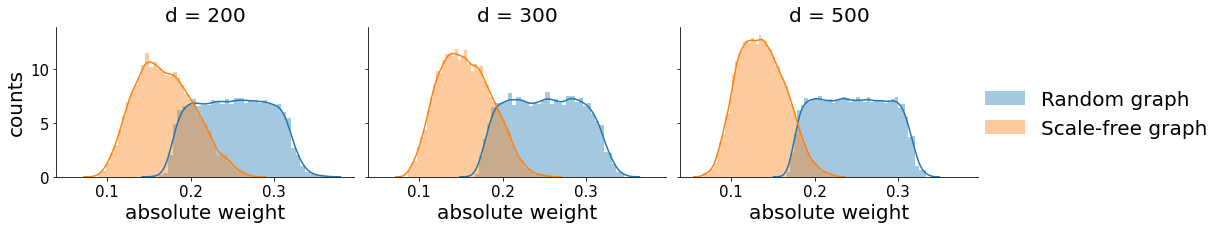

In [3]:
plot_weights((200, 300, 500), save=True)